In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [55]:
songs_base_df = pd.read_csv("./Resources/Spotify_Youtube.csv")
songs_base_df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [56]:
# songs_base_df.columns

In [57]:
songs_cleaned_df = songs_base_df.drop(columns='Unnamed: 0')
print(songs_cleaned_df.columns)
songs_cleaned_df.head()

Index(['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')


,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [58]:
print(songs_cleaned_df.dtypes)

Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object


In [59]:
#This is removing any object column that dosn't help with plots
songs_reduced_df = songs_base_df.drop(columns=['Unnamed: 0', 'Url_spotify', 'Album_type', 'Uri', 'Url_youtube', 
                                     'Title', 'Channel', 'Description', 'Licensed', 'official_video'])
print(songs_reduced_df.dtypes)
songs_reduced_df

Artist               object
Track                object
Album                object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Views               float64
Likes               float64
Comments            float64
Stream              float64
dtype: object


,Artist,Track,Album,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,693555221.0,6220896.0,169907.0,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,72011645.0,1079128.0,31003.0,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,8435055.0,282142.0,7399.0,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,211754952.0,1788577.0,55229.0,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,618480958.0,6197318.0,155930.0,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,71678.0,1113.0,0.0,9.227144e+06
20714,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,164741.0,2019.0,0.0,1.089818e+07
20715,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,35646.0,329.0,0.0,6.226110e+06
20716,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6533.0,88.0,0.0,6.873961e+06


In [60]:
songs_reduced_df.isna().any()

Artist              False
Track               False
Album               False
Danceability         True
Energy               True
Key                  True
Loudness             True
Speechiness          True
Acousticness         True
Instrumentalness     True
Liveness             True
Valence              True
Tempo                True
Duration_ms          True
Views                True
Likes                True
Comments             True
Stream               True
dtype: bool

In [61]:
#Looking for NaNs
songs_reduced_df.count()

Artist              20718
Track               20718
Album               20718
Danceability        20716
Energy              20716
Key                 20716
Loudness            20716
Speechiness         20716
Acousticness        20716
Instrumentalness    20716
Liveness            20716
Valence             20716
Tempo               20716
Duration_ms         20716
Views               20248
Likes               20177
Comments            20149
Stream              20142
dtype: int64

In [62]:
##Cleaned all columns with NaN 
##This is our Baseline DataFrame --no long a top 10 per artest dataframe
songs_reduced_noNaN = songs_reduced_df.dropna(how='any') #['Likes']
songs_reduced_noNaN.count()

Artist              19549
Track               19549
Album               19549
Danceability        19549
Energy              19549
Key                 19549
Loudness            19549
Speechiness         19549
Acousticness        19549
Instrumentalness    19549
Liveness            19549
Valence             19549
Tempo               19549
Duration_ms         19549
Views               19549
Likes               19549
Comments            19549
Stream              19549
dtype: int64

In [63]:
top_100_liked_df = songs_reduced_noNaN.sort_values('Likes',ascending=False)
top_100_liked_df = top_100_liked_df.head(100)
top_100_liked_df

,Artist,Track,Album,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
1147,Luis Fonsi,Despacito,VIDA,0.655,0.797,2.0,-4.787,0.1530,0.19800,0.000000,0.0670,0.839,177.928,229360.0,8.079649e+09,50788652.0,4252791.0,1.506598e+09
365,Daddy Yankee,Despacito,VIDA,0.655,0.797,2.0,-4.787,0.1530,0.19800,0.000000,0.0670,0.839,177.928,229360.0,8.079647e+09,50788626.0,4252791.0,1.506598e+09
14580,Charlie Puth,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),0.689,0.481,10.0,-7.503,0.0815,0.36900,0.000001,0.0649,0.283,80.025,229526.0,5.773798e+09,40147674.0,2127346.0,1.521255e+09
12469,Wiz Khalifa,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),0.689,0.481,10.0,-7.503,0.0815,0.36900,0.000001,0.0649,0.283,80.025,229526.0,5.773797e+09,40147618.0,2127345.0,1.521255e+09
14561,BTS,Dynamite,BE,0.746,0.765,6.0,-4.410,0.0993,0.01120,0.000000,0.0936,0.737,114.044,199054.0,1.640946e+09,35892575.0,16083138.0,1.582446e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13473,Adele,Rolling in the Deep,21,0.730,0.769,8.0,-5.114,0.0298,0.13800,0.000000,0.0473,0.507,104.948,228093.0,2.160009e+09,11603960.0,411966.0,1.303799e+09
13560,Avicii,Wake Me Up,True,0.532,0.783,2.0,-5.697,0.0523,0.00380,0.001200,0.1610,0.643,124.080,247427.0,2.221206e+09,11499037.0,620143.0,1.790784e+09
121,Eminem,Without Me,The Eminem Show,0.908,0.669,7.0,-2.827,0.0738,0.00286,0.000000,0.2370,0.662,112.238,290320.0,1.590485e+09,11469490.0,341006.0,1.457352e+09
129,Eminem,Not Afraid,Recovery,0.855,0.954,0.0,-1.190,0.2640,0.52900,0.000000,0.2050,0.668,114.635,248133.0,1.727241e+09,11425215.0,872181.0,7.899229e+08


In [64]:
top_100_liked_df.value_counts(subset='Artist')

Artist
BLACKPINK        6
BTS              4
Eminem           3
Ed Sheeran       3
Billie Eilish    3
                ..
Kimbra           1
Linkin Park      1
Luis Fonsi       1
Macklemore       1
j-hope           1
Length: 71, dtype: int64

In [65]:
##not all are devided by 10 with using the _noNaN dataframe but has correct ratio
mean_artist_likes = songs_reduced_noNaN.groupby(["Artist"])["Likes"].agg('mean')
# mean_artist_likes

In [66]:
artist_likes_summary = pd.DataFrame(
                        {"Average Likes": mean_artist_likes,
                         })
artist_likes_summary.sort_values('Average Likes', ascending=False)

,Average Likes
Artist,
BTS,13940380.8
BLACKPINK,13230250.5
Charlie Puth,8633692.5
Ed Sheeran,8354331.9
Justin Bieber,7858434.8
...,...
Thomas Karallus,68.5
Fünf Freunde,51.6
Simone & Simaria,46.0


In [67]:
##show how many of the rows have at least one Null 
songs_reduced_df[songs_reduced_df.isna().any(axis=1)]  

,Artist,Track,Album,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
30,Metallica,Enter Sandman (Remastered),Metallica (Remastered),0.566,0.834,6.0,-8.412,0.0298,0.002770,0.008000,0.0625,0.621,123.296,331560.0,5.735537e+08,2828795.0,81335.0,NaN
31,Metallica,Nothing Else Matters (Remastered),Metallica (Remastered),0.547,0.394,4.0,-9.793,0.0262,0.052200,0.000006,0.0795,0.170,142.370,388733.0,1.209806e+09,5127599.0,135946.0,NaN
32,Metallica,Master of Puppets (Remastered),Master of Puppets (Remastered Deluxe Box Set),0.539,0.828,4.0,-9.108,0.0350,0.000670,0.421000,0.1540,0.562,105.250,515387.0,2.076291e+07,293409.0,1703.0,NaN
34,Metallica,The Unforgiven (Remastered),Metallica (Remastered),0.531,0.583,7.0,-9.470,0.0256,0.018400,0.006240,0.2550,0.207,139.503,387160.0,4.261257e+08,1781690.0,46392.0,NaN
35,Metallica,One (Remastered),...And Justice for All (Remastered Deluxe Box ...,0.438,0.687,7.0,-9.150,0.0619,0.000668,0.080100,0.4200,0.426,103.010,446146.0,5.240000e+02,18.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20703,ThxSoMch,Imperfect Girl - Sped Up,Imperfect Girl,0.715,0.885,6.0,-6.269,0.0394,0.357000,0.000073,0.1240,0.675,139.333,143851.0,1.076260e+05,2759.0,29.0,NaN
20704,ThxSoMch,Like I'm British,Like I'm British,0.727,0.574,10.0,-6.015,0.1380,0.006430,0.005480,0.1160,0.378,163.388,88966.0,4.036000e+04,1458.0,14.0,NaN
20705,ThxSoMch,ONLY NEED MY BABY! (SMOAGT),ONLY NEED MY BABY! (SMOAGT),0.704,0.444,8.0,-10.679,0.0473,0.126000,0.029000,0.1710,0.448,91.853,99745.0,3.363600e+04,1282.0,20.0,NaN
20706,ThxSoMch,HOW YOU ALWAYS LOOK SO GOOD?,HOW YOU ALWAYS LOOK SO GOOD?,0.653,0.631,11.0,-8.876,0.0758,0.082800,0.003260,0.0953,0.303,87.642,128596.0,1.086790e+05,3209.0,36.0,NaN


In [68]:
#####################################################################################################
######################################################################################################

In [69]:
#This is pulled from the top 100 tracks some artist had more than one track on the top 100 likes
#This is a summary table
per_artist_summary = top_100_liked_df.groupby(['Artist']).agg({'Likes':'mean','Valence':'mean','Speechiness':'mean',
                                                           'Acousticness':'mean','Instrumentalness':'mean','Liveness':'mean',
                                                           'Energy':'mean'})
per_artist_summary_df = per_artist_summary.sort_values('Likes',ascending=False)
per_artist_summary_df = per_artist_summary_df.reset_index()
per_artist_summary_df

,Artist,Likes,Valence,Speechiness,Acousticness,Instrumentalness,Liveness,Energy
0,Luis Fonsi,50788652.0,0.8390,0.15300,0.19800,0.000000e+00,0.06700,0.7970
1,Wiz Khalifa,40147618.0,0.2830,0.08150,0.36900,1.030000e-06,0.06490,0.4810
2,Daddy Yankee,31912611.0,0.7475,0.10615,0.15400,9.700000e-07,0.06220,0.8285
3,Halsey,27588224.0,0.8030,0.08450,0.09330,0.000000e+00,0.19300,0.8620
4,Charlie Puth,26895411.5,0.3175,0.10775,0.49500,5.150000e-07,0.12195,0.5220
...,...,...,...,...,...,...,...,...
66,j-hope,11774615.0,0.1670,0.09530,0.00496,1.190000e-05,0.29400,0.8170
67,6ix9ine,11691864.0,0.3930,0.34100,0.02640,0.000000e+00,0.25100,0.6880
68,Adele,11603960.0,0.5070,0.02980,0.13800,0.000000e+00,0.04730,0.7690
69,Avicii,11499037.0,0.6430,0.05230,0.00380,1.200000e-03,0.16100,0.7830


In [ ]:
per_artist_summary.to_csv(artist_sum.csv, index=False)

In [ ]:
#A df of the top liked tracks per artist no duplicate no dups
top_artist_track = songs_reduced_noNaN.sort_values('Likes',ascending=False).drop_duplicates(subset=['Artist'],keep='first')
#top_artist_track = top_artist_track.drop_duplicates(subset=['Track'],keep='first')
top_artist_track.reset_index(inplace=True)
top_artist_track

### Here is where we would type our qeustions befor the charts and add explanation to the charts...
## Heading
# Heading
- bullet

In [16]:
print(per_artist_summary_df)



          Artist       Likes  Valence  Speechiness  Acousticness  \
0     Luis Fonsi  50788652.0   0.8390      0.15300       0.19800   
1    Wiz Khalifa  40147618.0   0.2830      0.08150       0.36900   
2   Daddy Yankee  31912611.0   0.7475      0.10615       0.15400   
3         Halsey  27588224.0   0.8030      0.08450       0.09330   
4   Charlie Puth  26895411.5   0.3175      0.10775       0.49500   
..           ...         ...      ...          ...           ...   
66        j-hope  11774615.0   0.1670      0.09530       0.00496   
67       6ix9ine  11691864.0   0.3930      0.34100       0.02640   
68         Adele  11603960.0   0.5070      0.02980       0.13800   
69        Avicii  11499037.0   0.6430      0.05230       0.00380   
70         Queen  11351580.0   0.2280      0.05360       0.28800   

    Instrumentalness  Liveness  Energy  
0       0.000000e+00   0.06700  0.7970  
1       1.030000e-06   0.06490  0.4810  
2       9.700000e-07   0.06220  0.8285  
3       0.000000e+0

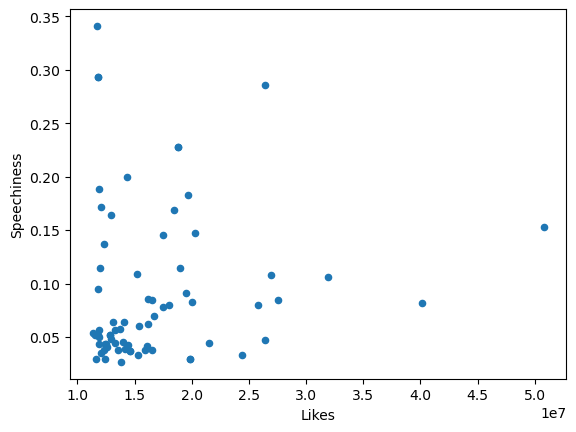

In [70]:
per_artist_summary_df.plot.scatter(x='Likes', y='Speechiness')
plt.show() 

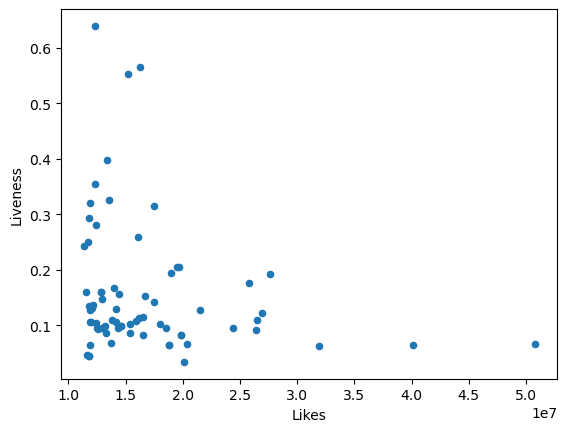

In [72]:
per_artist_summary_df.plot.scatter(x='Likes', y='Liveness')
plt.show()

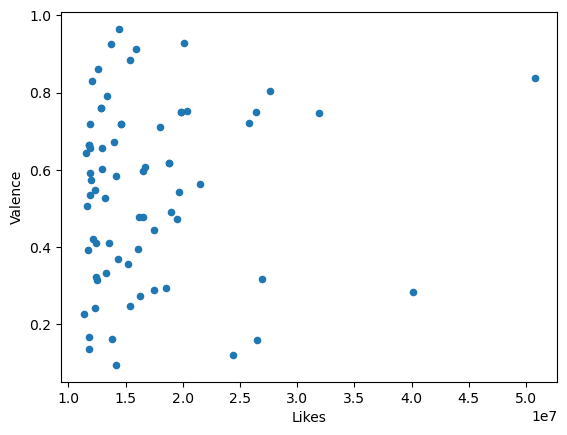

In [73]:
per_artist_summary_df.plot.scatter(x='Likes', y='Valence')
plt.show() 

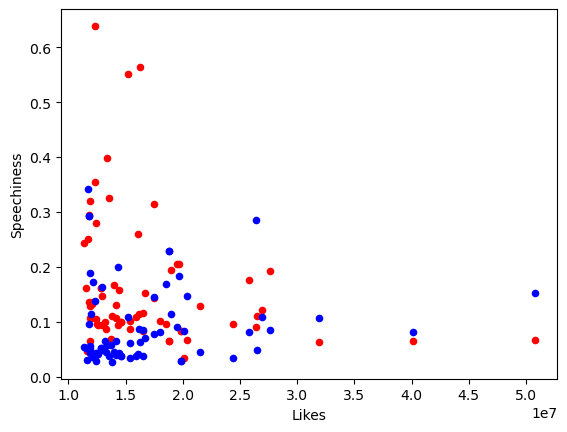

In [74]:
ax = per_artist_summary_df.plot.scatter(x='Likes', y='Liveness', color='red')

# Add the second scatter plot to the first one
per_artist_summary_df.plot.scatter(x='Likes', y='Speechiness', color='blue', ax=ax)

plt.show()

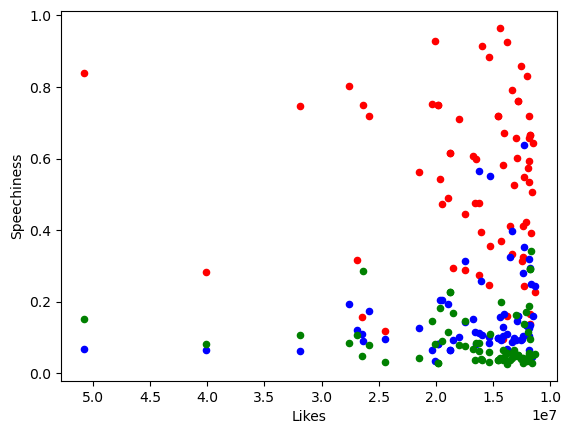

In [76]:
ax = per_artist_summary_df.plot.scatter(x='Likes', y='Valence', color='red')

# Add the second scatter plot to the first one
per_artist_summary_df.plot.scatter(x='Likes', y='Liveness', color='blue', ax=ax)

# Add the third scatter plot to the first two
per_artist_summary_df.plot.scatter(x='Likes', y='Speechiness', color='green', ax=ax)
# Reverse the values for x

ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig('artist_summary_plot.png')